In [1]:
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, LeakyReLU, BatchNormalization, Reshape, Flatten, Conv2DTranspose
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt

In [2]:
(Xt_dst, Yt_dst), (X_tdst, Y_tdst) = mnist.load_data()
dst_X = np.concatenate((Xt_dst, X_tdst), axis = 0).reshape((70000, 28, 28, 1))/255
dst_Y = np.ones((70000, 1))

In [3]:
def select_real_samples(n_batch):
    rnd = np.random.randint(low = 0, high = 70000, size = n_batch)
    X = dst_X[rnd, :, :, :]
    Y = np.ones((n_batch, 1))
    return X, Y

def generate_fake_samples(generator, latent_dim, n_batch):
    X = np.random.uniform(low=0.0, high=1.0, size = latent_dim).reshape((1, latent_dim))
    for i in range(1, n_batch):
        x = np.random.uniform(low=0.0, high=1.0, size = latent_dim).reshape((1, latent_dim))
        X = np.concatenate((X, x), axis = 0)
    X = generator.predict(X)
    Y = np.zeros((n_batch, 1))
    return X, Y

def generate_latent_points(latent_dim, n_batch):
    X = np.random.uniform(low=0.0, high=1.0, size = latent_dim).reshape((1, latent_dim))
    for i in range(1, n_batch):
        x = np.random.uniform(low=0.0, high=1.0, size = latent_dim).reshape((1, latent_dim))
        X = np.concatenate((X, x), axis = 0)
    Y = np.ones((n_batch, 1))
    return X, Y

In [29]:
def disc_model():
    model = Sequential()

    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02), input_shape=(28,28, 1)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    
    return model

In [28]:
def genr_model():
    model = Sequential()
    n_nodes = 64 * 7 * 7

    model.add(Dense(n_nodes, kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02), input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Reshape((7, 7, 64)))

    model.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Conv2D(1, (3,3), activation='sigmoid', padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    
    return model

In [23]:
def gn_model(g_model, d_model):
    d_model.trainable = False
    
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    
    model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=0.0002, beta_1=0.5))
    return model

In [30]:
generator = genr_model()
discriminator = disc_model()
gan_model = gn_model(generator, discriminator)

In [16]:
n_batch = 256
latent_dim = 100

In [10]:
def showim(n):
    im, _ = generate_fake_samples(generator, latent_dim, n)
    for i in range(n):
        img = im[i, :, :, :]
        img = np.concatenate((img, img, img), axis = 2)
        plt.imshow(img)
        plt.show()

1/1 [==============================] - 0s 52ms/step


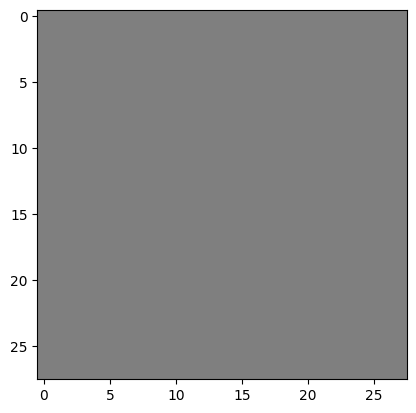

1/1 [==============================] - 0s 10ms/step


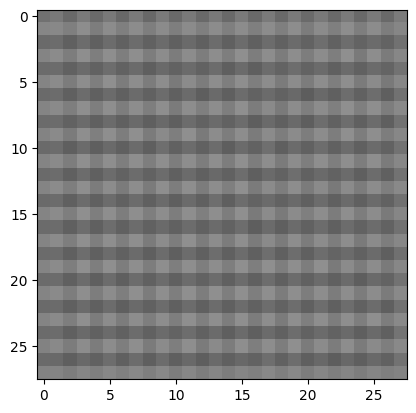

1/1 [==============================] - 0s 10ms/step


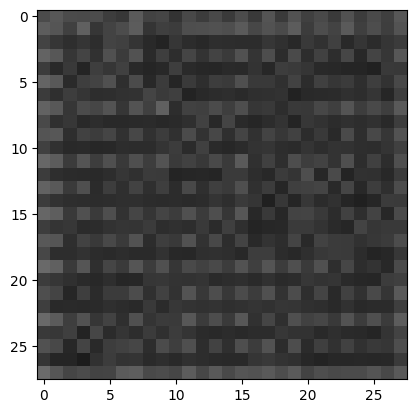

1/1 [==============================] - 0s 10ms/step


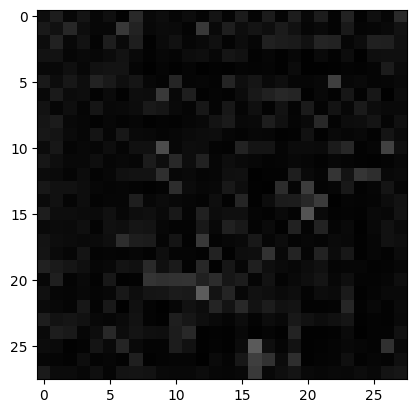

1/1 [==============================] - 0s 10ms/step


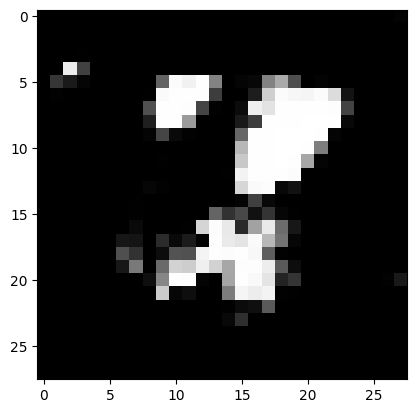

1/1 [==============================] - 0s 10ms/step


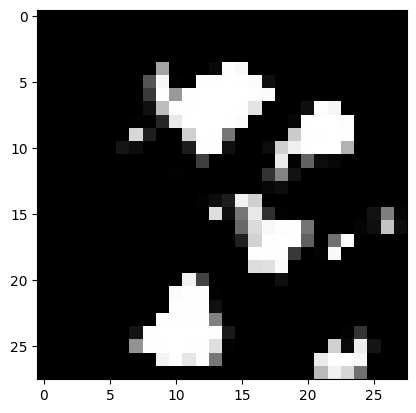

1/1 [==============================] - 0s 11ms/step


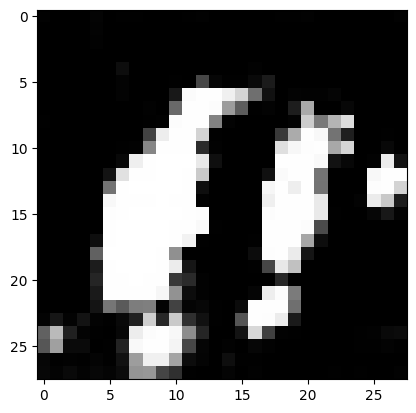

1/1 [==============================] - 0s 10ms/step


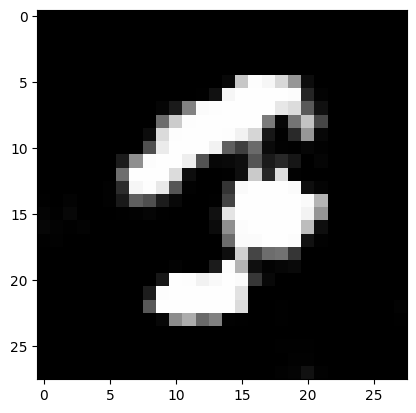

1/1 [==============================] - 0s 10ms/step


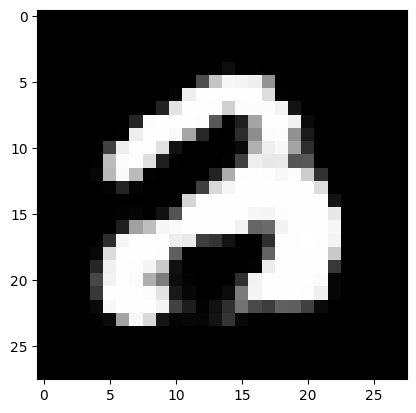

1/1 [==============================] - 0s 10ms/step


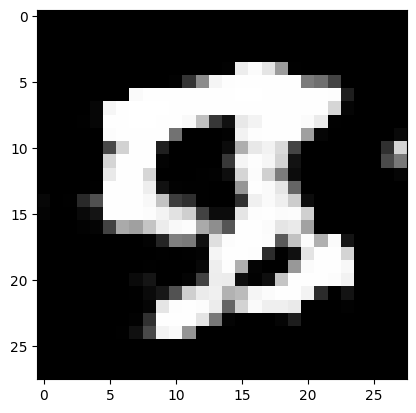

1/1 [==============================] - 0s 10ms/step


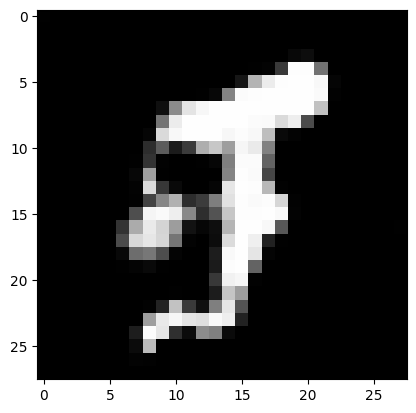

1/1 [==============================] - 0s 10ms/step


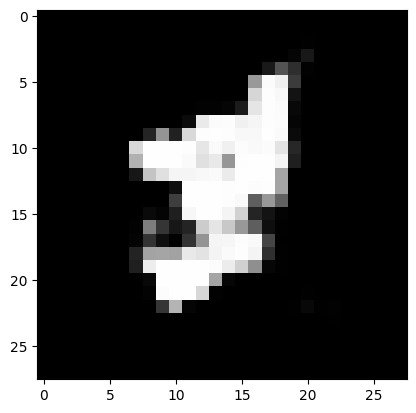

1/1 [==============================] - 0s 10ms/step


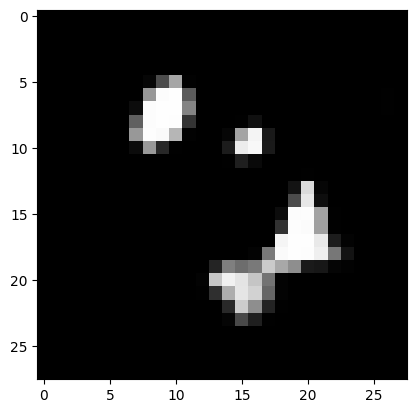

1/1 [==============================] - 0s 11ms/step


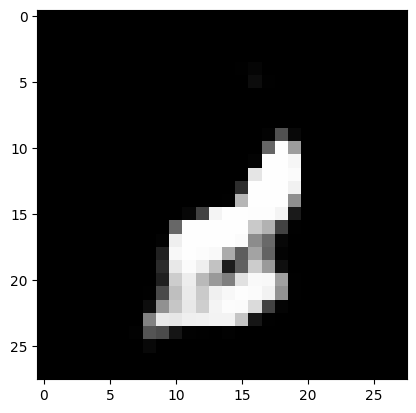

1/1 [==============================] - 0s 10ms/step


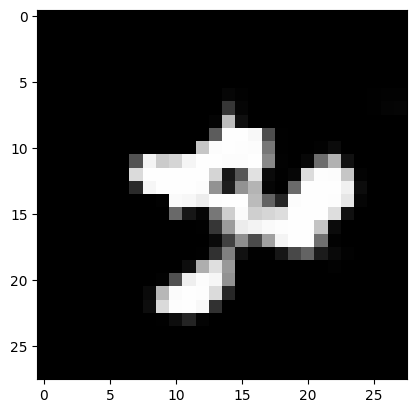

8/8 [==============================] - 0s 8ms/step


KeyboardInterrupt: 

In [31]:
for i in range(10000):
    X_real, Y_real = select_real_samples(n_batch)
    X_fake, Y_fake = generate_fake_samples(generator, latent_dim, n_batch)
    X, Y = np.vstack((X_real, X_fake)), np.vstack((Y_real, Y_fake))
    d_loss = discriminator.train_on_batch(X, Y)
    X_gan, Y_gan = generate_latent_points(latent_dim, n_batch)
    g_loss = gan_model.train_on_batch(X_gan, Y_gan)
    # print(str(i) + '> d_loss1:' + str(d_loss) + '     d_loss2:' + str(d_loss) + '     g_loss:' + str(g_loss) + '     ['  + str(i) + ']')
    if i%100 == 0:
        showim(1)

1/1 [==============================] - 0s 18ms/step


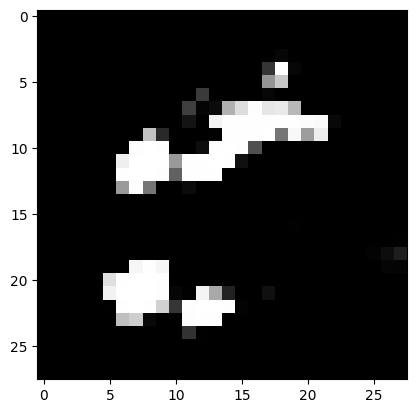

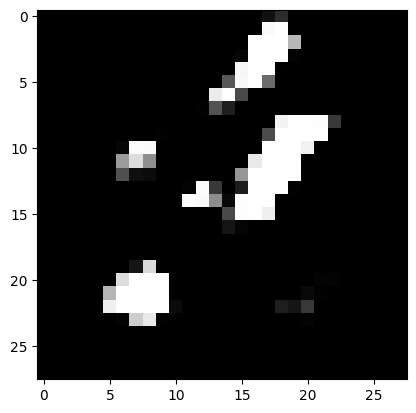

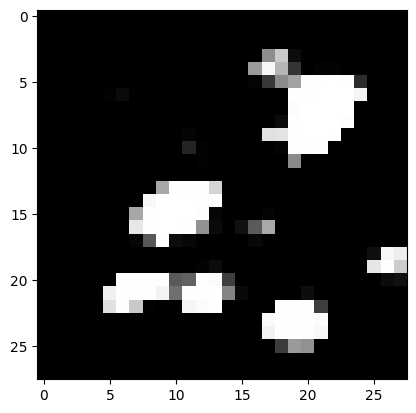

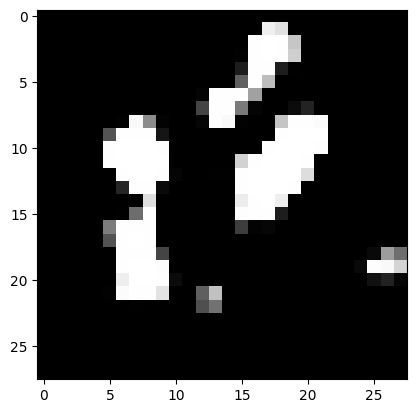

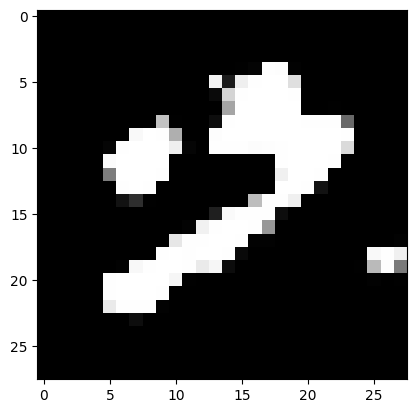

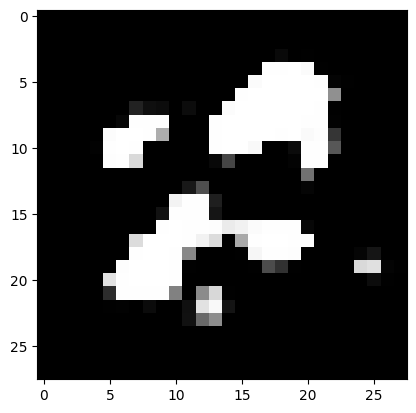

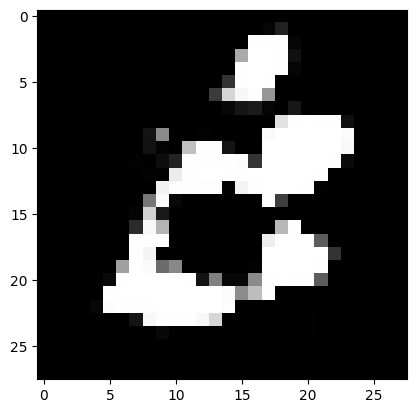

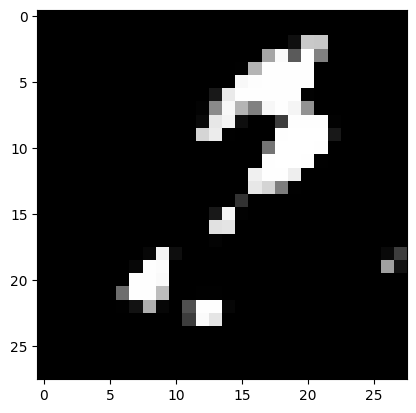

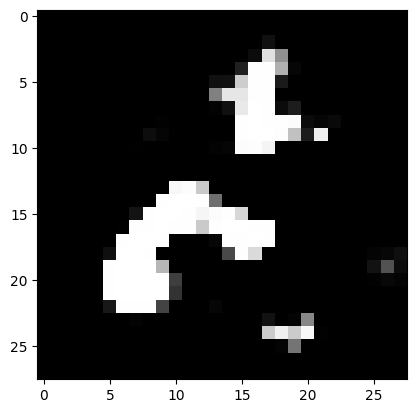

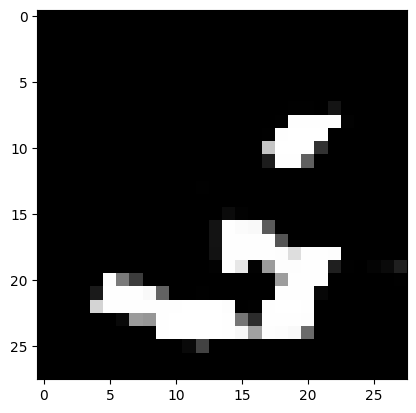

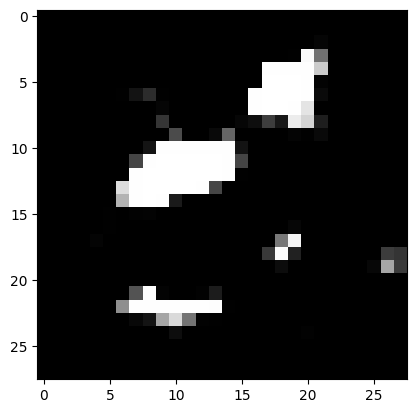

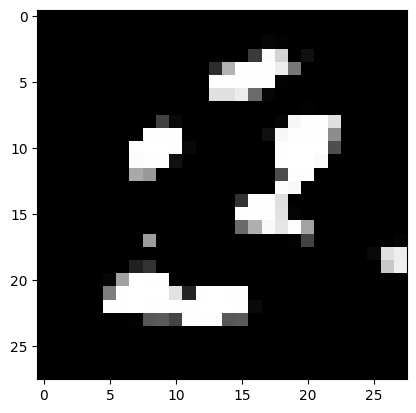

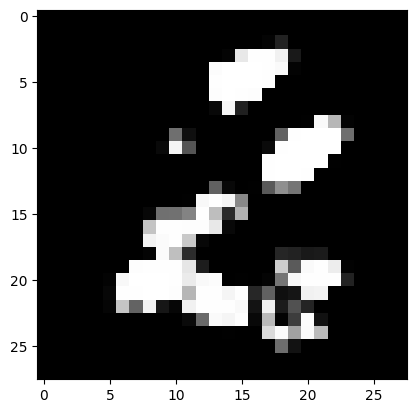

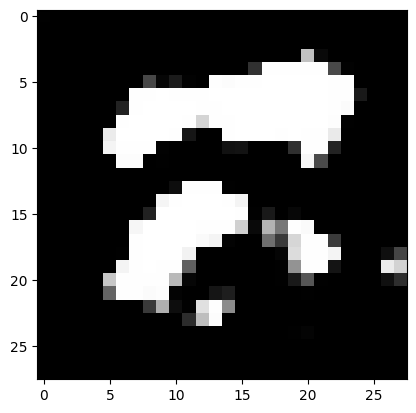

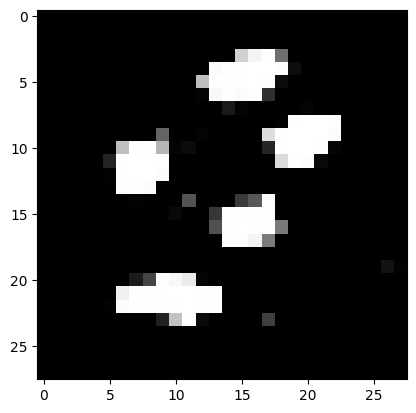

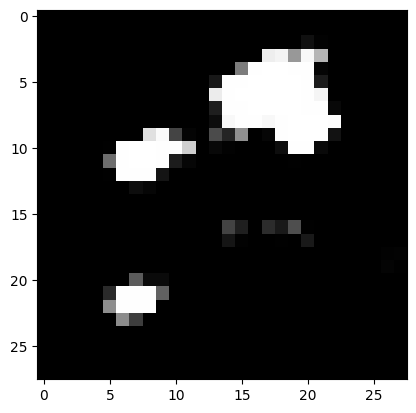

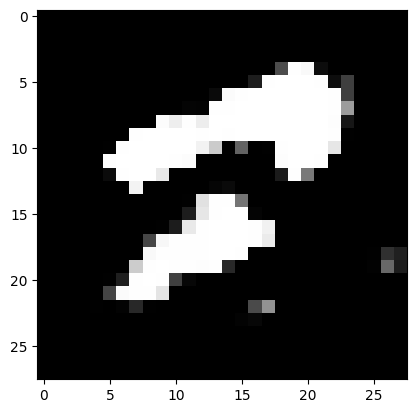

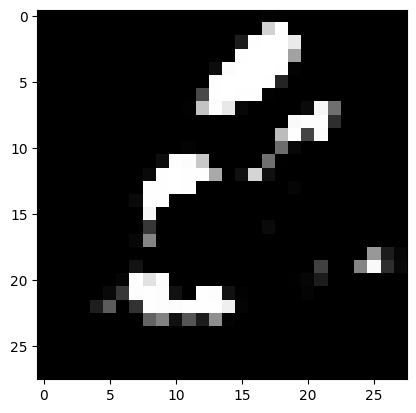

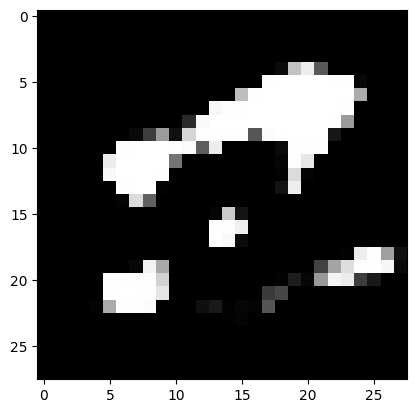

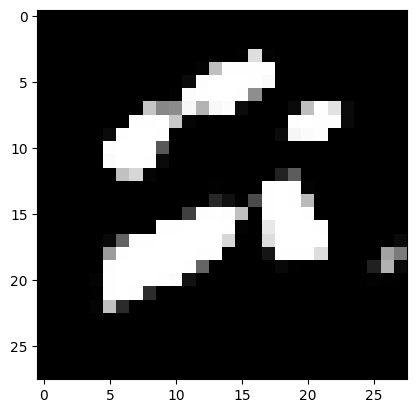

In [20]:
showim(20)

1/1 [==============================] - 0s 14ms/step


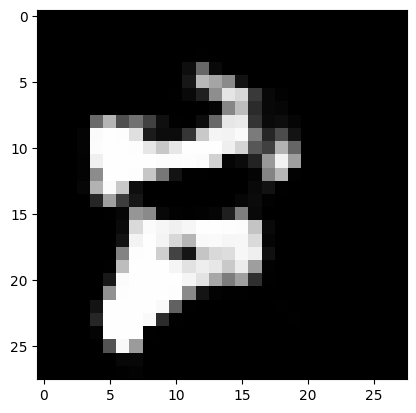

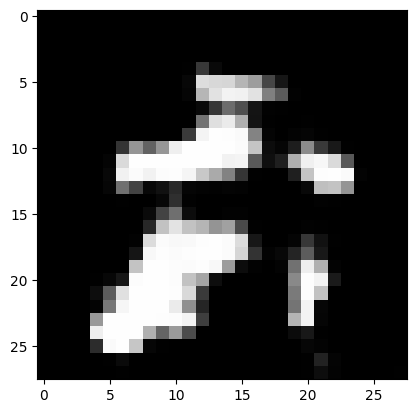

In [32]:
showim(2)

# **=========================================================**

In [ ]:
#for cifar10
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, LeakyReLU, BatchNormalization, Reshape, Flatten, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
X_cfr = np.concatenate((x_train, x_test), axis = 0)/255
Y_cfr = np.ones((60000, 1))



def showCFRim(n):
    im, _ = generate_fake_samples_cfr(generator, latent_dim, n)
    for i in range(n):
        img = im[i, :, :, :]
        plt.imshow(img)
        plt.show()

        
        

def disc_model_cfr():
    model = Sequential()

    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02), input_shape=(32, 32, 3)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    
    return model



def genr_model_cfr():
    model = Sequential()
    n_nodes = 64 * 8 * 8

    model.add(Dense(n_nodes, kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02), input_dim=1000))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Reshape((8, 8, 64)))

    model.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Conv2D(3, (3,3), activation='sigmoid', padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    
    return model



def gn_model(g_model, d_model):
    d_model.trainable = False
    
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    
    model.compile(loss='binary_crossentropy', optimizer = Adam(lr=0.0002, beta_1=0.5))
    return model



discriminator = disc_model_cfr()
generator = genr_model_cfr()
gan_model = gn_model(generator, discriminator)



#for cifar10
def select_real_samples_cfr(n_batch):
    rnd = np.random.randint(low = 0, high = 60000, size = n_batch)
    X = X_cfr[rnd, :, :, :]
    Y = np.ones((n_batch, 1))
    return X, Y

def generate_fake_samples_cfr(generator, latent_dim, n_batch):
    X = np.random.normal(0.0, 0.02, size = latent_dim).reshape((1, latent_dim))
    for i in range(1, n_batch):
        x = np.random.normal(0.0, 0.02, size = latent_dim).reshape((1, latent_dim))
        X = np.concatenate((X, x), axis = 0)
    X = generator.predict(X)
    Y = np.zeros((n_batch, 1))
    return X, Y

def generate_latent_points_cfr(latent_dim, n_batch):
    X = np.random.normal(0.0, 0.02, size = latent_dim).reshape((1, latent_dim))
    for i in range(1, n_batch):
        x = np.random.normal(0.0, 0.02, size = latent_dim).reshape((1, latent_dim))
        X = np.concatenate((X, x), axis = 0)
    Y = np.ones((n_batch, 1))
    return X, Y

In [ ]:
np.random.uniform(low=0.0, high=1.0, size = latent_dim).reshape((1, latent_dim))
np.random.normal(0.0, 0.02, size = latent_dim).reshape((1, latent_dim))

In [ ]:
n_batch = 128
latent_dim = 1000

for i in range(100001):
    X_real, Y_real = select_real_samples_cfr(int(n_batch/2.0))
    X_fake, Y_fake = generate_fake_samples_cfr(generator, latent_dim, int(n_batch/2.0))

    X, Y = np.vstack((X_real, X_fake)), np.vstack((Y_real, Y_fake))
    d_loss = discriminator.train_on_batch(X, Y)
    
    X_gan, Y_gan = generate_latent_points_cfr(latent_dim, n_batch)
    g_loss = gan_model.train_on_batch(X_gan, Y_gan)
    
    if i%500 == 0:
        print('d_loss1:' + str(d_loss1) + '     g_loss:' + str(g_loss) + '     ['  + str(i) + ']')
    if i%100 == 0:
        showCFRim(1)

In [ ]:
d_loss1 = discriminator.train_on_batch(X_real, Y_real)
d_loss2 = discriminator.train_on_batch(X_fake, Y_fake)

In [ ]:
showCFRim(10)

# **=======================================================**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_test.shape

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, LeakyReLU, BatchNormalization, Reshape, Flatten, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt



In [ ]:
X_fsn = np.concatenate((x_train, x_test), axis = 0)/255
Y_fsn = np.ones((70000, 1))

In [ ]:
X_fsn = X_fsn.reshape((70000, 28, 28, 1))

In [ ]:
#for fsn mnist






def showFSNim(n):
    im, _ = generate_fake_samples_fsn(generator, latent_dim, n)
    for i in range(n):
        img = im[i, :, :, :]
        img = np.concatenate((img, img, img), axis = 2)
        plt.imshow(img)
        plt.show()

        
        

def disc_model_fsn():
    model = Sequential()

    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02), input_shape=(28, 28, 1)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    
    return model



def genr_model_fsn():
    model = Sequential()
    n_nodes = 64 * 7 * 7

    model.add(Dense(n_nodes, kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02), input_dim=1000))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Reshape((7, 7, 64)))

    model.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Conv2D(1, (3,3), activation='sigmoid', padding='same', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.02)))
    
    return model



def gn_model(g_model, d_model):
    d_model.trainable = False
    
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    
    model.compile(loss='binary_crossentropy', optimizer = Adam(lr=0.0002, beta_1=0.5))
    return model



discriminator = disc_model_fsn()
generator = genr_model_fsn()
gan_model = gn_model(generator, discriminator)




def select_real_samples_fsn(n_batch):
    rnd = np.random.randint(low = 0, high = 70000, size = n_batch)
    X = X_fsn[rnd, :, :, :]
    Y = np.ones((n_batch, 1))
    return X, Y

def generate_fake_samples_fsn(generator, latent_dim, n_batch):
    X = np.random.uniform(low=0.0, high=1.0, size = latent_dim).reshape((1, latent_dim))
    for i in range(1, n_batch):
        x = np.random.uniform(low=0.0, high=1.0, size = latent_dim).reshape((1, latent_dim))
        X = np.concatenate((X, x), axis = 0)
    X = generator.predict(X)
    Y = np.zeros((n_batch, 1))
    return X, Y

def generate_latent_points_fsn(latent_dim, n_batch):
    X = np.random.uniform(low=0.0, high=1.0, size = latent_dim).reshape((1, latent_dim))
    for i in range(1, n_batch):
        x = np.random.uniform(low=0.0, high=1.0, size = latent_dim).reshape((1, latent_dim))
        X = np.concatenate((X, x), axis = 0)
    Y = np.ones((n_batch, 1))
    return X, Y

In [ ]:
n_batch = 128
latent_dim = 1000

for i in range(3000):
    X_real, Y_real = select_real_samples_fsn(n_batch)
    X_fake, Y_fake = generate_fake_samples_fsn(generator, latent_dim, n_batch)
    X, Y = np.vstack((X_real, X_fake)), np.vstack((Y_real, Y_fake))
    d_loss = discriminator.train_on_batch(X, Y)
    X_gan, Y_gan = generate_latent_points_fsn(latent_dim, n_batch)
    g_loss = gan_model.train_on_batch(X_gan, Y_gan)
    if i%500 == 0:
        print('d_loss:' + str(d_loss) + '     g_loss:' + str(g_loss) + '     ['  + str(i) + ']')
    if i%100 == 0:
        showFSNim(1)

In [ ]:
# example of training a gan on mnist
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

In [ ]:
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
    model = Sequential()
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim):
    model = Sequential()
    # foundation for 7x7 image
    n_nodes = 128 * 7 * 7
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 128)))
    # upsample to 14x14
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 28x28
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model

In [ ]:
def define_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(g_model)
    # add the discriminator
    model.add(d_model)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model
# load and prepare mnist training images
def load_real_samples():
    # load mnist dataset
    (trainX, _), (_, _) = load_data()
    # expand to 3d, e.g. add channels dimension
    X = expand_dims(trainX, axis=-1)
    # convert from unsigned ints to floats
    X = X.astype('float32')
    # scale from [0,255] to [0,1]
    X = X / 255.0
    return X
# select real samples
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate ✬real✬ class labels (1)
    y = ones((n_samples, 1))
    return X, y
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create ✬fake✬ class labels (0)
    y = zeros((n_samples, 1))
    return X, y

In [ ]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
    # plot images
    for i in range(n * n):
        # define subplot
        pyplot.subplot(n, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')

In [ ]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
    # prepare real samples
    X_real, y_real = generate_real_samples(dataset, n_samples)
    # evaluate discriminator on real examples
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    # evaluate discriminator on fake examples
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    # save plot
    save_plot(x_fake, epoch)

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected ✬real✬ samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # generate ✬fake✬ examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # create training set for the discriminator
            X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
            # update discriminator model weights
            d_loss, _ = d_model.train_on_batch(X, y)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # update the generator via the discriminator✬s error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('>%d, %d/%d, d=%.3f, g=%.3f'% (i+1, j+1, bat_per_epo, d_loss, g_loss))
        # evaluate the model performance, sometimes
        if (i+1) % 10 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()


In [ ]:
# train model
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs = 5)

In [ ]:
a = generate_fake_samples(g_model, latent_dim, 100)

In [ ]:
a = a[0]